In [1]:
import tropycal.tracks as tracks
import pandas as pd
from datetime import date as dt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from calendar import monthrange
import numpy as np
from useful_functions import month_genesis_locs
from useful_functions import grid_counter
import warnings

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Download ibtracs dataset
basin_dataset = tracks.TrackDataset(basin='north_atlantic',source='ibtracs',include_btk=True)

--> Starting to read in ibtracs data
--> Completed reading in ibtracs data (19.31 seconds)
--> Starting to read in best track data
--> Completed reading in best track data (0.68 seconds)


# Create scatter plot of TC Genesis Locations and Density

/glade/u/home/acheung/.conda/envs/snowflakes/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1785: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = super().pcolormesh(*args, **kwargs)
/glade/u/home/acheung/.conda/envs/snowflakes/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1785: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = super().pcolormesh(*args, **kwargs)
/glade/u/home/acheung/.conda/envs/snowflakes/lib/python3.10/site-packages/

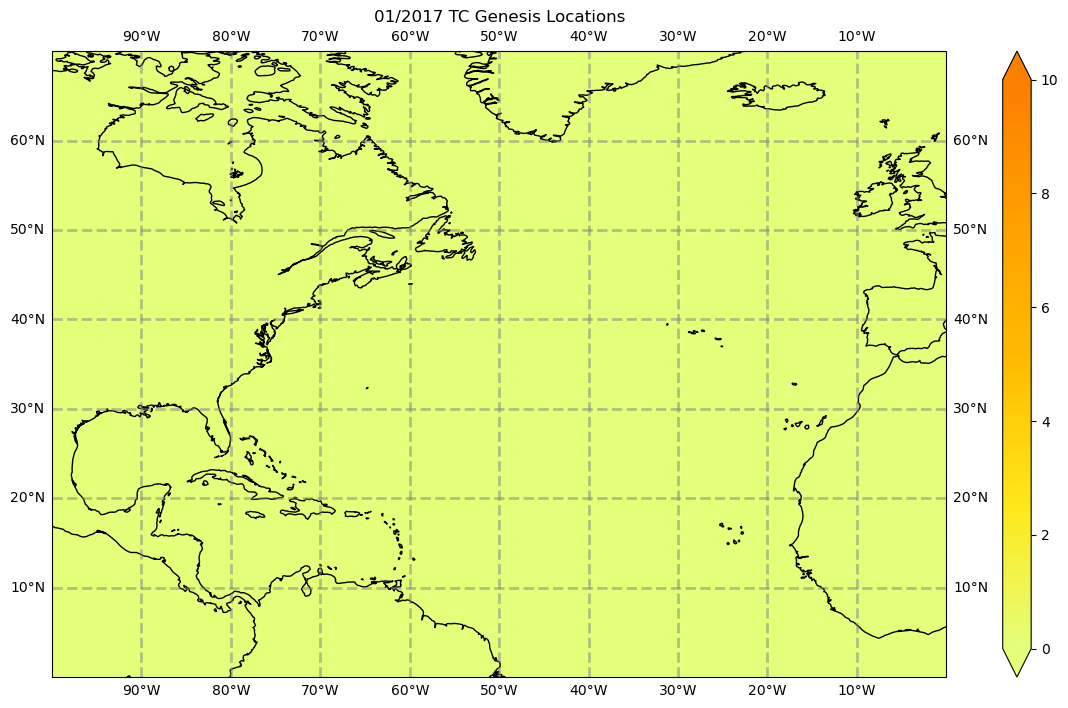

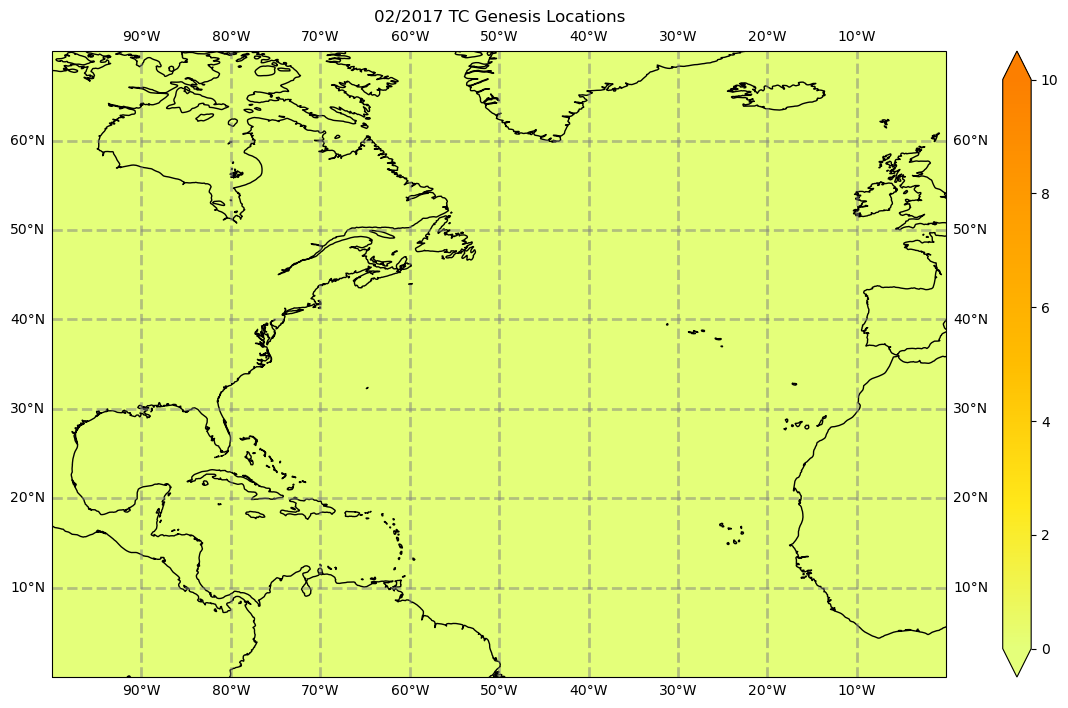

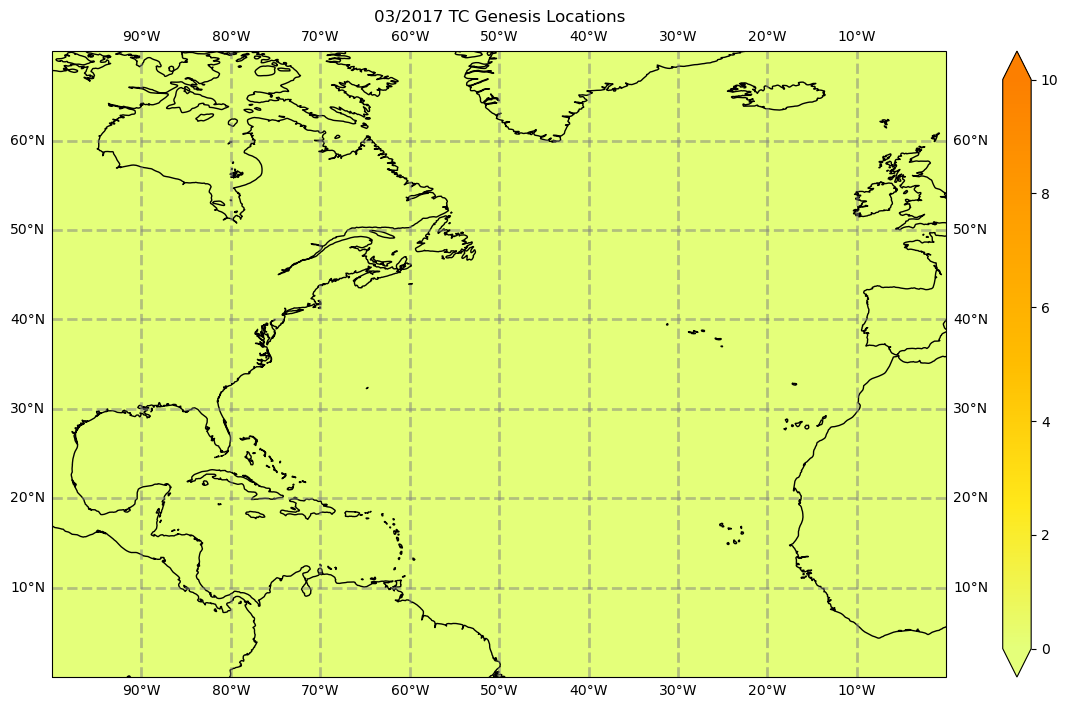

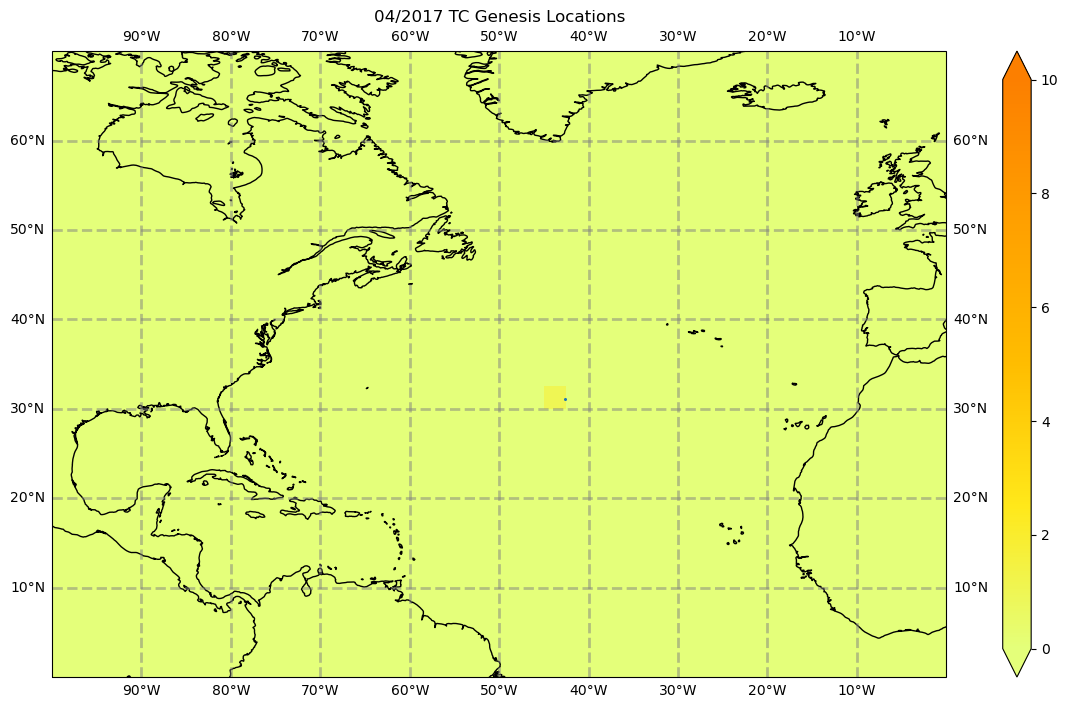

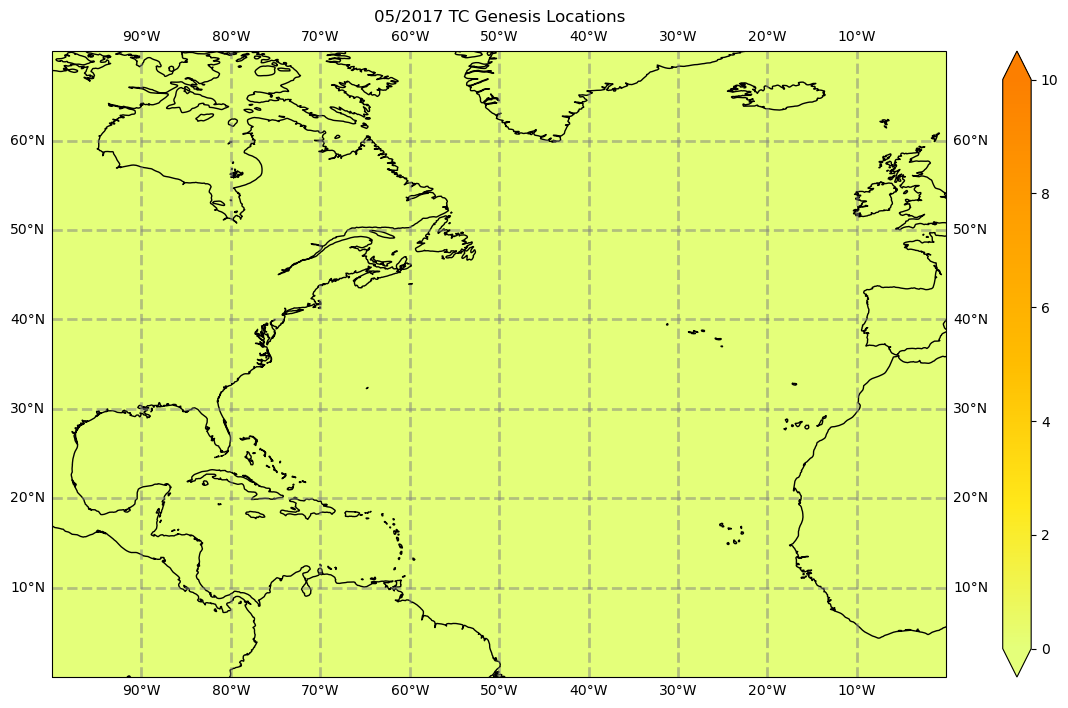

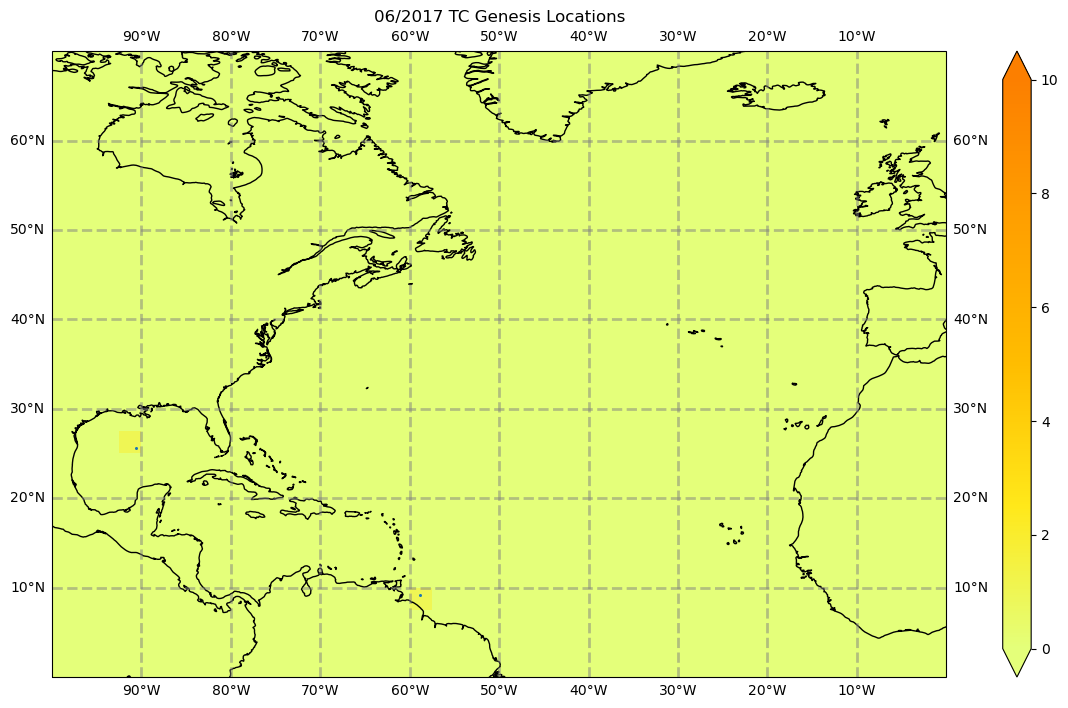

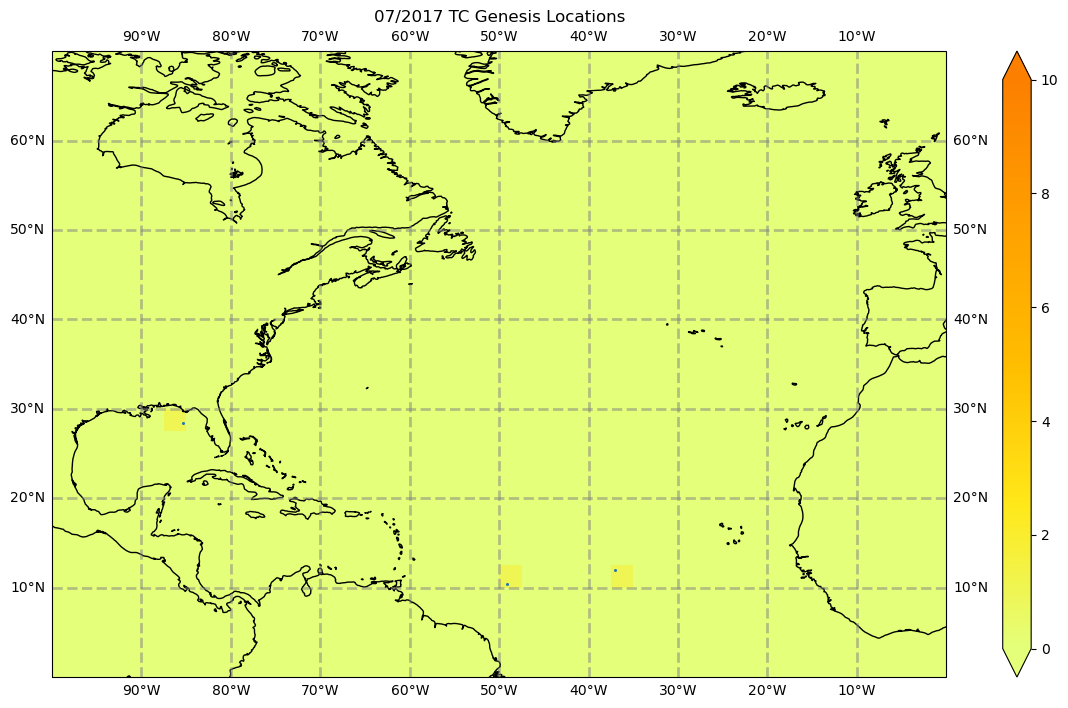

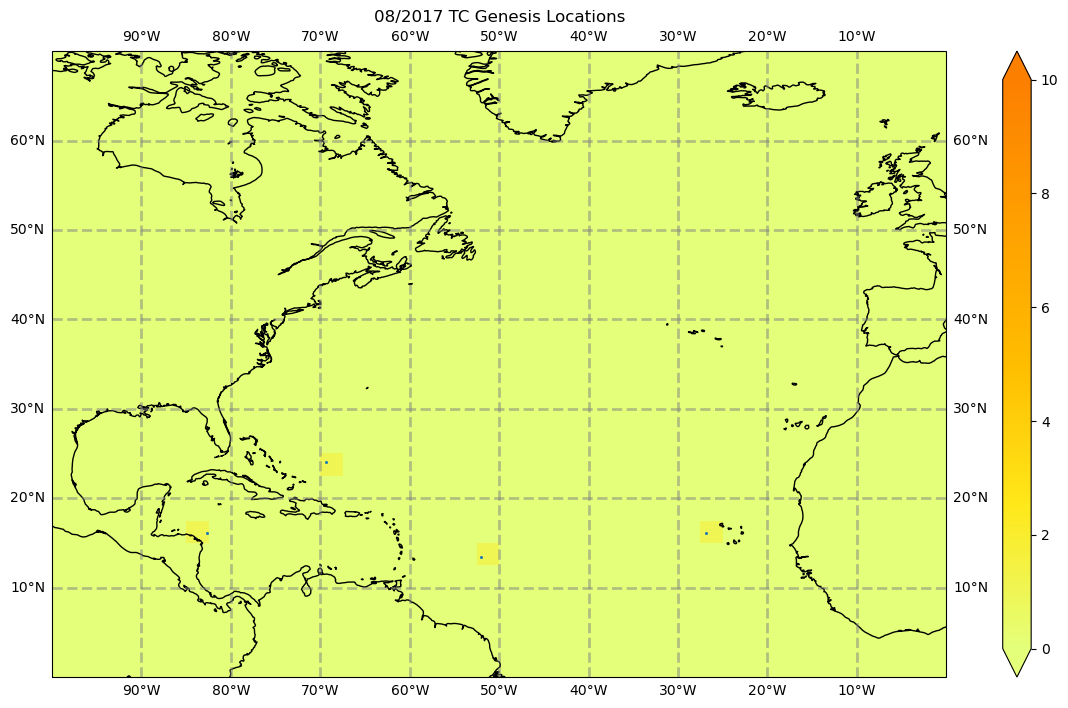

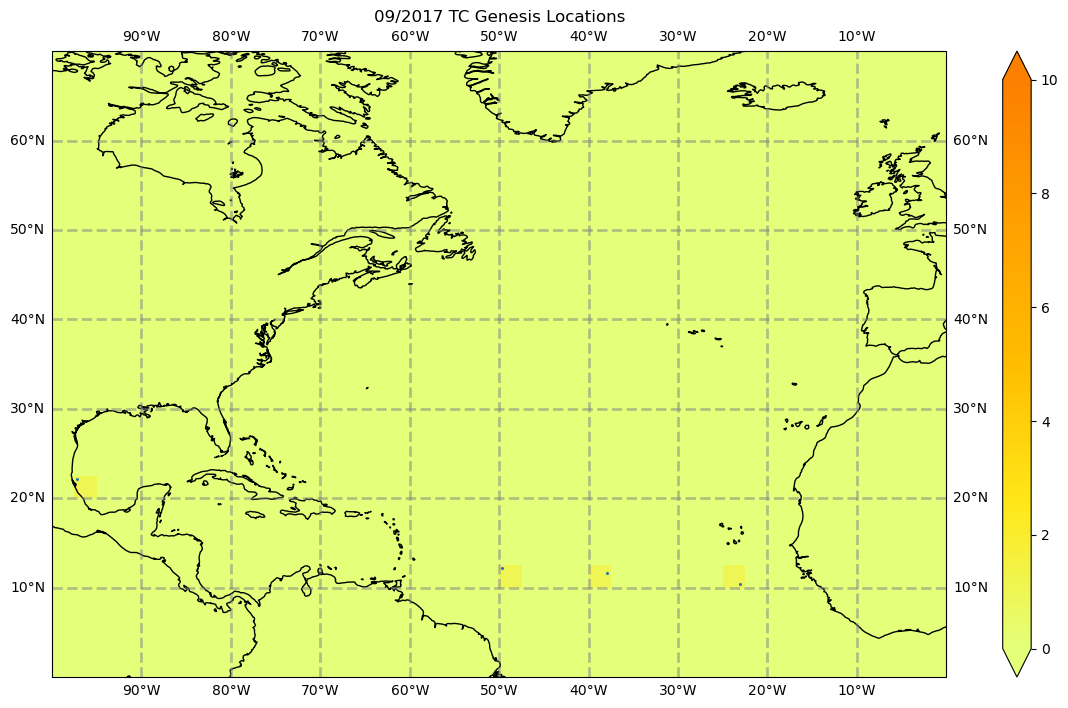

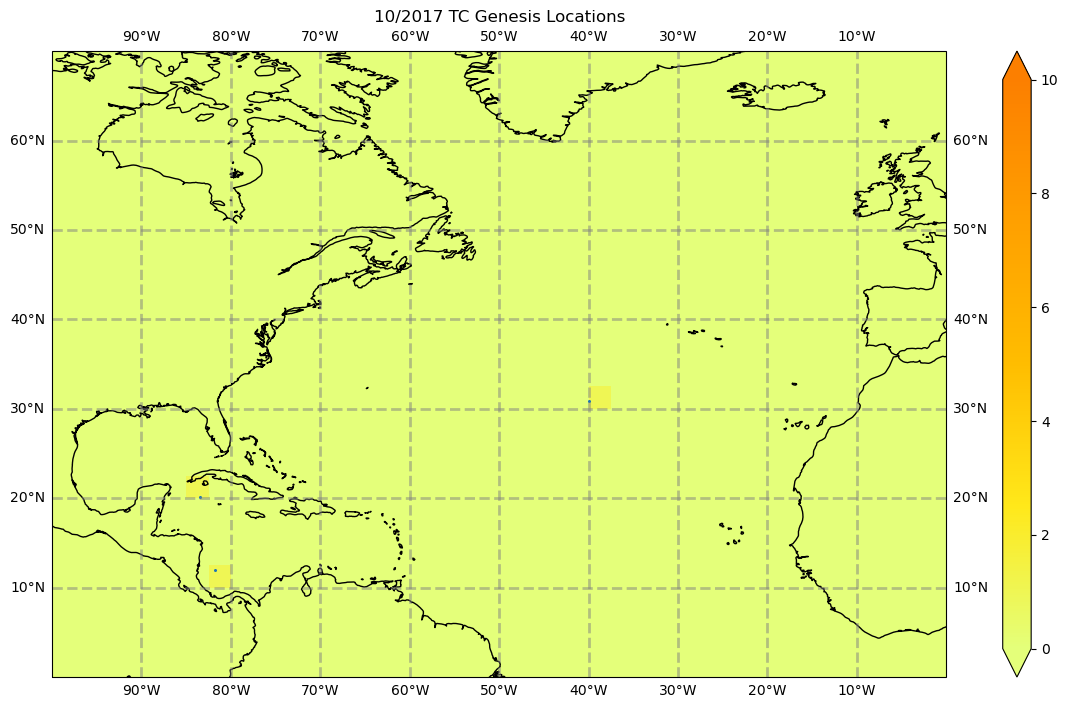

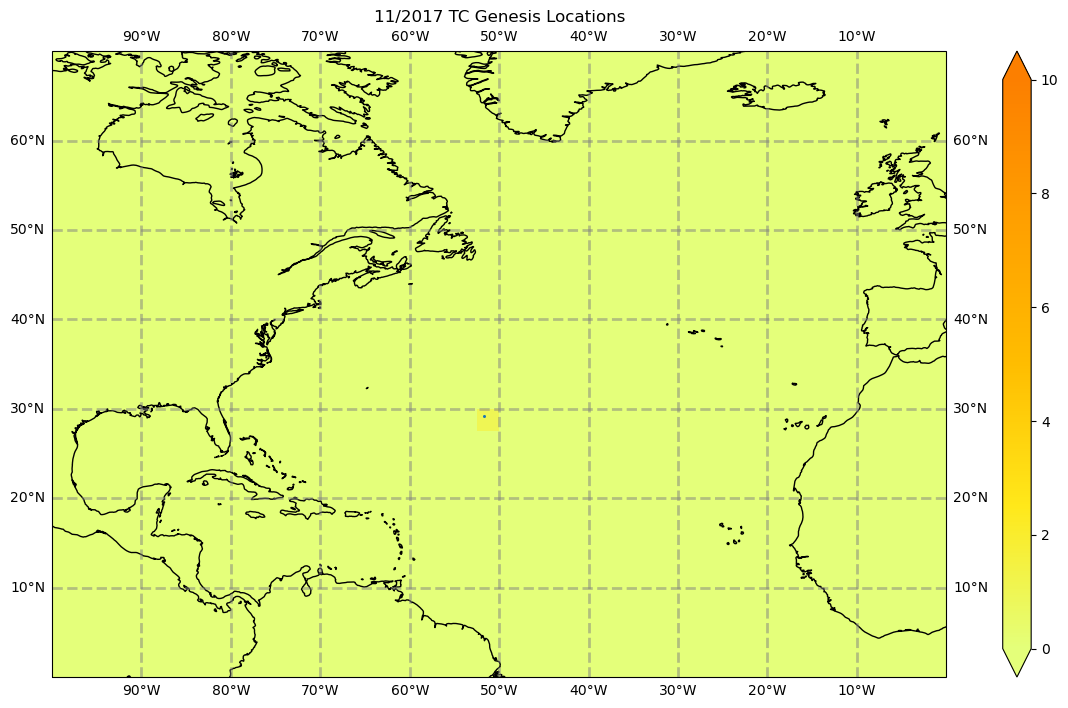

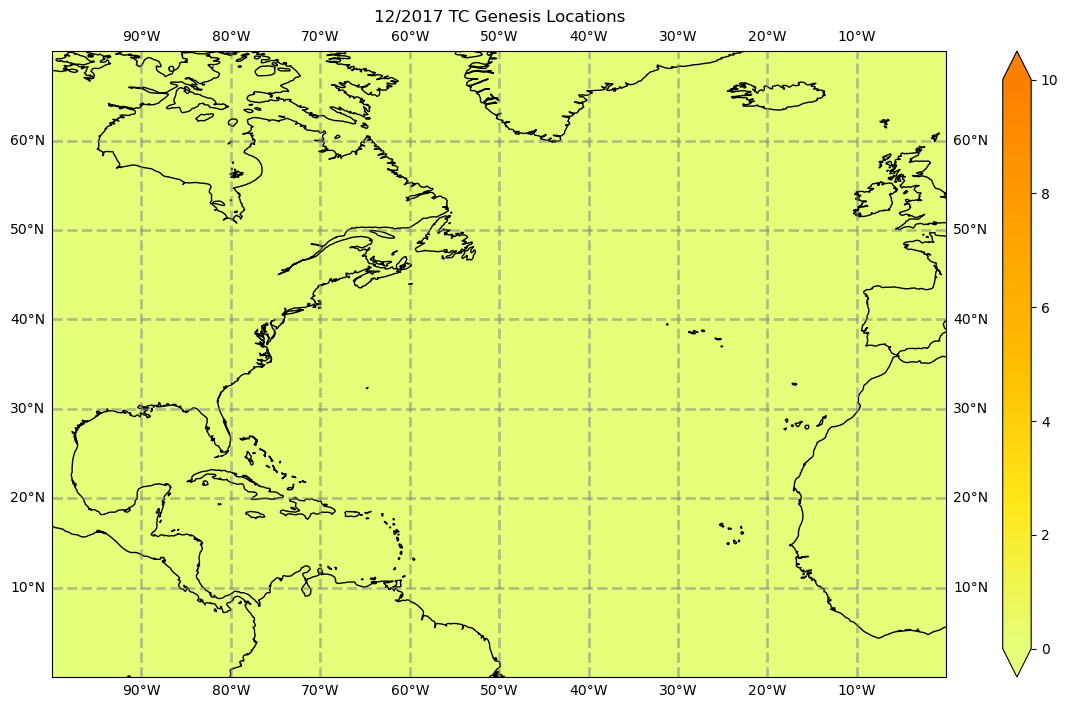

In [3]:
for month_desired_loop in range(1,12+1): # Loop over different months
    year_desired = np.arange(2017,2017+1,1) # Specify years desired
    vmin = 0 # Minimum storm intensity filter (0 turns this feature off)
    
    month_desired = month_desired_loop
    
    # Create Month String
    if month_desired < 10:
        month_str = '0' + str(month_desired)
    else:
        month_str = str(month_desired)
    
    # If multi-year data
    if len(year_desired) > 1:
        start_lons = []
        start_lats = []
        for year_now in year_desired: # month_genesis_locs finds genesis locationns for a specific month and year (loop over many years)
            start_lons_year_now,start_lats_year_now = month_genesis_locs(year_now,month_desired,basin_dataset,vmin)
            start_lons.append(start_lons_year_now.values)
            start_lats.append(start_lats_year_now.values)
        # Create cumulative arrays of the locations
        start_lats = np.concatenate(start_lats, axis=0)
        start_lons = np.concatenate(start_lons, axis=0)
        # Year Range String
        yearstr = str(year_desired[0]) + '-' + str(year_desired[-1])
    else: # If single year data
        start_lons,start_lats = month_genesis_locs(year_desired[0],month_desired,basin_dataset,vmin)
        yearstr = str(year_desired[0])
    
    # Grid Counter
    delta_degs = 2.5 # Size of boxes in degrees
    lon_ranges = [-100,10] # Lon range to count (in the last value, add 10 to your desired value)
    lat_ranges = [0,80] # Lat range to count (in the last value, add 10 to your desired value)
    total_data_arr,longrid,latgrid = grid_counter(delta_degs,lon_ranges,lat_ranges,start_lons,start_lats) # Call grid_counter function
    
    # Create cartopy plot
    fig = plt.figure(figsize=(12,7))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-100, 0, 0, 70], crs=ccrs.PlateCarree()) # Map extent
    genesis_density = ax.pcolormesh(longrid,latgrid,total_data_arr,cmap='Wistia',vmin=0,vmax=10) # Plot density
    cbar = plt.colorbar(genesis_density,extend='both') # Defined Colorbar Range using vmin/vmax
    scattermap = ax.scatter(start_lons, start_lats, transform=ccrs.PlateCarree(),s=1.4) # Plot genesis locations
    ax.coastlines(resolution='50m')
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,ylocs=np.arange(0,70,10),
                      linewidth=2, color='gray', alpha=0.5, linestyle='--',xlocs=np.arange(-100,0,10))
    ax.set_title(str(month_str) + '/' + yearstr + ' TC Genesis Locations')
    plt.tight_layout()
    plt.savefig('/glade/work/acheung/Initial_Plots/Best_Track/best_track_' + yearstr + '_'+ month_str+'.jpg',dpi=300)